# Give problem statement:
## What you are trying to solve

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize

plt.style.use('ggplot')

import nltk

In [64]:
#Give path to the csv file that contains the data
DATA_PATH = '/Users/yashoda/Documents/Personal Project/DSAT.csv'

In [68]:
#Reading the Dataset
df = pd.read_csv(DATA_PATH)
df.head(n=10)

,week,date,order_number,order_create_date,delivery_date,tracking_number,rider_id,rider_name,hub_name,logistic_name,rating,lvl3_destination_address_name,lvl4_destination_address_name,review_content,review_create_date,venture,bu_flag,package_type,cp_flag
0,21,25,203992109510066,5/19/2022 1:13,NaN,TOT-NP-000424278,NaN,NaN,NP-Total_TRANSPORT,NP-Total,5,Lalitpur Outside Ring Road,Lalitpur - Imadole Area,I working great!,5/25/2022 23:21,NP,MP,Sales_order,0
1,38,24,203992109510066,9/14/2022 16:24,NaN,TOT-NP-000424279,NaN,NaN,NP-Total_TRANSPORT,NP-Total,5,Lalitpur Outside Ring Road,Lalitpur - Harisiddhi Patan Area,always punctual and decent.,9/24/2022 16:54,NP,MP,Sales_order,0
2,50,12,203992109510066,12/4/2022 21:40,NaN,TOT-NP-000424280,NaN,NaN,NP-Total_TRANSPORT,NP-Total,1,Lalitpur Outside Ring Road,Lalitpur - Harisiddhi Patan Area,He called me and told me delivery gardinchu bu...,12/12/2022 21:27,NP,MP,Sales_order,0
3,10,10,203992109510066,1/28/2023 2:02,NaN,TOT-NP-000424281,NaN,NaN,NP-Total_TRANSPORT,NP-Total,5,Nepalgunj,Dhamboji Area,soche jasto ramro xina sound nai xina,3/10/2023 16:12,NP,MP,Sales_order,0
4,9,3,203992109510066,3/2/2022 10:45,NaN,TOT-NP-000424282,NaN,NaN,NP-Aramex-API_TRANSPORT,NP-Aramex-API,5,Damak,Damak Buspark Area,Bhai le saman chado lai dincha.,3/3/2022 19:57,NP,MP,Sales_order,0
5,16,18,203992109510066,NaN,NaN,TOT-NP-000424283,NaN,NaN,NP-Aramex-API_TRANSPORT,NP-Aramex-API,5,Sunwal,Badera,timely delivered,4/18/2022 16:53,NP,MP,Sales_order,0
6,34,28,203992109510066,8/25/2022 11:49,NaN,TOT-NP-000424284,NaN,NaN,NP-Aramex-API_TRANSPORT,NP-Aramex-API,5,Dang - Tulsipur,Tulsipur Buspark Area,Fantastic,8/28/2022 18:34,NP,MP,Sales_order,0
7,46,17,203992109510066,11/11/2022 18:38,NaN,TOT-NP-000424285,NaN,NaN,NP-Aramex-API_TRANSPORT,NP-Aramex-API,5,Dhangadhi,Campus Road Area,delivery was very good. they keep you updated ...,11/17/2022 15:47,NP,WH,Sales_order,0
8,46,19,203992109510066,11/16/2022 22:57,NaN,TOT-NP-000424286,NaN,NaN,NP-Aramex-API_TRANSPORT,NP-Aramex-API,5,Nepalgunj,BP Chowk Area,Very good 👍🏿,11/19/2022 8:43,NP,MP,Sales_order,0
9,4,25,203992109510066,1/17/2023 14:21,NaN,TOT-NP-000424287,NaN,NaN,NP-Aramex-API_TRANSPORT,NP-Aramex-API,5,Birtamod,Mechi Eye Hospital Area,I am very happy and fully satisfy with the pro...,1/25/2023 14:40,NP,MP,Sales_order,0


In [5]:
#Identifying the count of dataset
print(df.shape)

(39645, 19)


In [70]:
#Running analysis only for 500 rows
df = df.head(500)
print(df.shape)

(500, 19)


5    443
1     27
4     16
3      8
2      6
Name: rating, dtype: int64


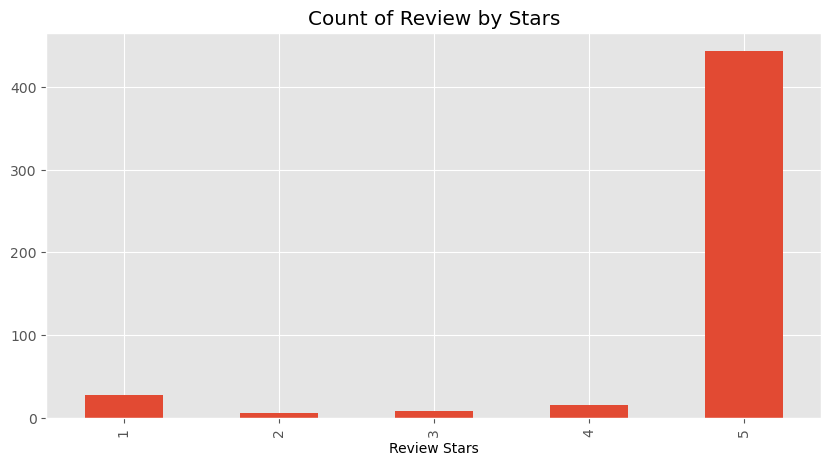

In [71]:
#Quick EDA and Sorting and visualization of rating count
print(df['rating'].value_counts())

ax = df['rating'].value_counts().sort_index().plot(kind = 'bar',
      title = 'Count of Review by Stars',
      figsize = (10,5))

ax.set_xlabel('Review Stars')
plt.show()

In [9]:
#Basic NLTK

In [10]:
example = df['review_content'][2]
print(example)

He called me and told me delivery gardinchu but then he didn’t called! Ani saman ekdum late delivery vayo!


In [14]:
#hgfhg
nltk.download('punkt')
nltk.word_tokenize(example)

[nltk_data] Downloading package punkt to /Users/yashoda/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['He',
 'called',
 'me',
 'and',
 'told',
 'me',
 'delivery',
 'gardinchu',
 'but',
 'then',
 'he',
 'didn',
 '’',
 't',
 'called',
 '!',
 'Ani',
 'saman',
 'ekdum',
 'late',
 'delivery',
 'vayo',
 '!']

In [15]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['He',
 'called',
 'me',
 'and',
 'told',
 'me',
 'delivery',
 'gardinchu',
 'but',
 'then']

In [16]:
#Part of Speech
nltk.download('averaged_perceptron_tagger')
nltk.pos_tag(tokens)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/yashoda/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[('He', 'PRP'),
 ('called', 'VBD'),
 ('me', 'PRP'),
 ('and', 'CC'),
 ('told', 'VBD'),
 ('me', 'PRP'),
 ('delivery', 'NN'),
 ('gardinchu', 'NN'),
 ('but', 'CC'),
 ('then', 'RB'),
 ('he', 'PRP'),
 ('didn', 'VBZ'),
 ('’', 'JJ'),
 ('t', 'NN'),
 ('called', 'VBN'),
 ('!', '.'),
 ('Ani', 'NNP'),
 ('saman', 'JJ'),
 ('ekdum', 'NN'),
 ('late', 'JJ'),
 ('delivery', 'NN'),
 ('vayo', 'NN'),
 ('!', '.')]

In [17]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('He', 'PRP'),
 ('called', 'VBD'),
 ('me', 'PRP'),
 ('and', 'CC'),
 ('told', 'VBD'),
 ('me', 'PRP'),
 ('delivery', 'NN'),
 ('gardinchu', 'NN'),
 ('but', 'CC'),
 ('then', 'RB')]

In [18]:
#Pretty Print
nltk.download('maxent_ne_chunker')
nltk.download('words')
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  He/PRP
  called/VBD
  me/PRP
  and/CC
  told/VBD
  me/PRP
  delivery/NN
  gardinchu/NN
  but/CC
  then/RB
  he/PRP
  didn/VBZ
  ’/JJ
  t/NN
  called/VBN
  !/.
  (PERSON Ani/NNP)
  saman/JJ
  ekdum/NN
  late/JJ
  delivery/NN
  vayo/NN
  !/.)


[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /Users/yashoda/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /Users/yashoda/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [19]:
 #VADER Sentiment Scoring 

In [20]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
nltk.download('vader_lexicon')

# Create a SentimentIntensityAnalyzer instance
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/yashoda/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [21]:
# Analyze the sentiment of a text
sia.polarity_scores("I am so happy!")

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [22]:
sia.polarity_scores("This is the worst thing ever.")

{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

In [23]:
sia.polarity_scores(example)

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [24]:
!pip install --upgrade jupyter ipywidgets

In [25]:
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


In [26]:
#Run the polarity score on the entire dataset
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['review_content']
    myid = row['tracking_number']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/500 [00:00<?, ?it/s]

In [27]:
pd.DataFrame(res).T

,neg,neu,pos,compound
TOT-NP-000424278,0.000,0.185,0.815,0.6588
TOT-NP-000424279,0.000,1.000,0.000,0.0000
TOT-NP-000424280,0.000,1.000,0.000,0.0000
TOT-NP-000424281,0.000,1.000,0.000,0.0000
TOT-NP-000424282,0.000,1.000,0.000,0.0000
...,...,...,...,...
TOT-NP-000424773,0.296,0.704,0.000,-0.9041
TOT-NP-000424774,0.000,0.000,1.000,0.5859
TOT-NP-000424775,0.000,0.493,0.507,0.8012
TOT-NP-000424776,0.000,0.256,0.744,0.4404


In [28]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'tracking_number'})
vaders = vaders.merge(df, how = 'left')

In [29]:
vaders

,tracking_number,neg,neu,pos,compound,week,date,order_number,order_create_date,delivery_date,...,logistic_name,rating,lvl3_destination_address_name,lvl4_destination_address_name,review_content,review_create_date,venture,bu_flag,package_type,cp_flag
0,TOT-NP-000424278,0.000,0.185,0.815,0.6588,21,25,203992109510066,5/19/2022 1:13,NaN,...,NP-Total,5,Lalitpur Outside Ring Road,Lalitpur - Imadole Area,I working great!,5/25/2022 23:21,NP,MP,Sales_order,0
1,TOT-NP-000424279,0.000,1.000,0.000,0.0000,38,24,203992109510066,9/14/2022 16:24,NaN,...,NP-Total,5,Lalitpur Outside Ring Road,Lalitpur - Harisiddhi Patan Area,always punctual and decent.,9/24/2022 16:54,NP,MP,Sales_order,0
2,TOT-NP-000424280,0.000,1.000,0.000,0.0000,50,12,203992109510066,12/4/2022 21:40,NaN,...,NP-Total,1,Lalitpur Outside Ring Road,Lalitpur - Harisiddhi Patan Area,He called me and told me delivery gardinchu bu...,12/12/2022 21:27,NP,MP,Sales_order,0
3,TOT-NP-000424281,0.000,1.000,0.000,0.0000,10,10,203992109510066,1/28/2023 2:02,NaN,...,NP-Total,5,Nepalgunj,Dhamboji Area,soche jasto ramro xina sound nai xina,3/10/2023 16:12,NP,MP,Sales_order,0
4,TOT-NP-000424282,0.000,1.000,0.000,0.0000,9,3,203992109510066,3/2/2022 10:45,NaN,...,NP-Aramex-API,5,Damak,Damak Buspark Area,Bhai le saman chado lai dincha.,3/3/2022 19:57,NP,MP,Sales_order,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,TOT-NP-000424773,0.296,0.704,0.000,-0.9041,4,26,203992109510066,1/24/2023 22:43,1/26/2023 18:56,...,NP-DEX,5,Kathmandu Metro 3 - Baluwatar Area,Baluwatar,Just received the packet. But it is not accura...,1/26/2023 13:40,NP,MP,Sales_order,0
496,TOT-NP-000424774,0.000,0.000,1.000,0.5859,5,31,203992109510066,1/28/2023 20:26,1/31/2023 18:52,...,NP-DEX,5,Pokhara,Malepatan Area,👏 amazing,1/31/2023 15:31,NP,MP,Sales_order,0
497,TOT-NP-000424775,0.000,0.493,0.507,0.8012,6,9,203992109510066,2/7/2023 10:06,NaN,...,NP-DEX,5,Kathmandu Metro 1 - Naxal Area,Naxal Bhagwati Bahal Area,Very good service. i am very happy with delive...,2/9/2023 22:29,NP,MP,Sales_order,1
498,TOT-NP-000424776,0.000,0.256,0.744,0.4404,7,15,203992109510066,2/10/2023 9:29,2/12/2023 19:12,...,NP-DEX,5,Kathmandu Metro 20 - Marutol Area,Marutole,Good service,2/15/2023 14:45,NP,MP,Sales_order,0


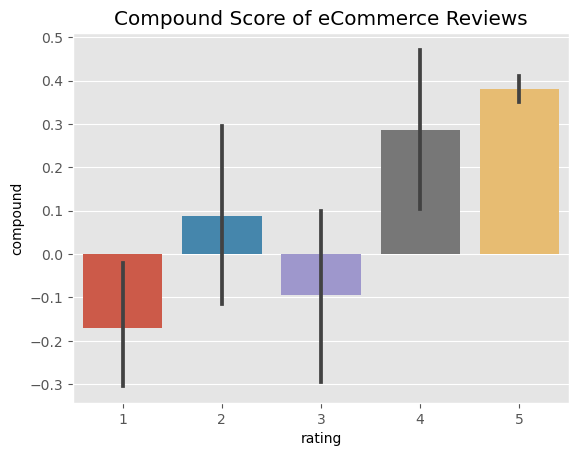

In [30]:
ax = sns.barplot(data = vaders, x ='rating', y ='compound')
ax.set_title('Compound Score of eCommerce Reviews')
plt.show()

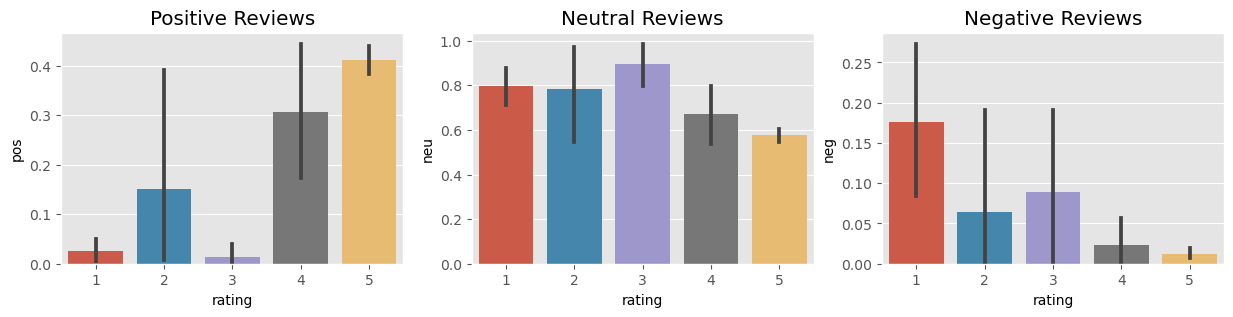

In [31]:
fig, axs = plt.subplots (1, 3, figsize = (15, 3))
sns.barplot(data = vaders, x ='rating', y ='pos', ax=axs [0])
sns.barplot(data = vaders, x ='rating', y ='neu', ax=axs [1])
sns.barplot(data = vaders, x ='rating', y ='neg', ax=axs [2])

axs[0].set_title('Positive Reviews')
axs[1].set_title('Neutral Reviews')
axs[2].set_title('Negative Reviews')

plt.show()

# Explanation

In [32]:
#RoBERTa (Robustly Optimized Bidirectional Encoder Representations from Transformers) Pretraining Approach

In [33]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [34]:
#the Hugging Face Transformers library to load a pre-trained RoBERTa model 
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [35]:
#Pull in a specific model pretrained on bunch of data for sentiment provided by Hugging Face
# Extract model weights that have been stored and do transfer learning
# No need to retrain the model

In [36]:
#VADER results on example
print (example)
sia.polarity_scores(example)

He called me and told me delivery gardinchu but then he didn’t called! Ani saman ekdum late delivery vayo!


{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [37]:
#Run Roberta Model
encoded_text = tokenizer(example, return_tensors = 'pt')
output = model(**encoded_text)
rating = output[0][0].detach().numpy()
rating = softmax(rating)
rating_dict = {
    'roberta_neg': rating[0],
    'roberta_neu': rating[1],
    'roberta_pos': rating[2]
}
print(rating_dict)

#Resulting that the Roberta Model is better than the VADER model

{'roberta_neg': 0.5695119, 'roberta_neu': 0.40171498, 'roberta_pos': 0.028773144}


In [38]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors = 'pt')
    output = model(**encoded_text)
    rating = output[0][0].detach().numpy()
    rating = softmax(rating)
    rating_dict = {
        'roberta_neg': rating[0],
        'roberta_neu': rating[1],
        'roberta_pos': rating[2]
    }
    return rating_dict

In [39]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['review_content']
        myid = row['tracking_number']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {f"vader_{key}": value
                               for key, value in vader_result.items()}
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f"Error processing for {myid}")

  0%|          | 0/500 [00:00<?, ?it/s]

In [40]:
 vader_result

{'neg': 0.0, 'neu': 0.432, 'pos': 0.568, 'compound': 0.8812}

In [41]:
roberta_result

{'roberta_neg': 0.0016106177,
 'roberta_neu': 0.013256525,
 'roberta_pos': 0.9851328}

In [42]:
{**vader_result, **roberta_result}

{'neg': 0.0,
 'neu': 0.432,
 'pos': 0.568,
 'compound': 0.8812,
 'roberta_neg': 0.0016106177,
 'roberta_neu': 0.013256525,
 'roberta_pos': 0.9851328}

In [43]:
both

{'vader_neg': 0.0,
 'vader_neu': 0.432,
 'vader_pos': 0.568,
 'vader_compound': 0.8812,
 'roberta_neg': 0.0016106177,
 'roberta_neu': 0.013256525,
 'roberta_pos': 0.9851328}

In [46]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'tracking_number'})
results_df = results_df.merge(df, how = 'left')

In [47]:
results_df.head()

,tracking_number,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,week,date,...,logistic_name,rating,lvl3_destination_address_name,lvl4_destination_address_name,review_content,review_create_date,venture,bu_flag,package_type,cp_flag
0,TOT-NP-000424278,0.0,0.185,0.815,0.6588,0.002396,0.032511,0.965093,21,25,...,NP-Total,5,Lalitpur Outside Ring Road,Lalitpur - Imadole Area,I working great!,5/25/2022 23:21,NP,MP,Sales_order,0
1,TOT-NP-000424279,0.0,1.000,0.000,0.0000,0.017360,0.289225,0.693416,38,24,...,NP-Total,5,Lalitpur Outside Ring Road,Lalitpur - Harisiddhi Patan Area,always punctual and decent.,9/24/2022 16:54,NP,MP,Sales_order,0
2,TOT-NP-000424280,0.0,1.000,0.000,0.0000,0.569512,0.401715,0.028773,50,12,...,NP-Total,1,Lalitpur Outside Ring Road,Lalitpur - Harisiddhi Patan Area,He called me and told me delivery gardinchu bu...,12/12/2022 21:27,NP,MP,Sales_order,0
3,TOT-NP-000424281,0.0,1.000,0.000,0.0000,0.107341,0.816993,0.075667,10,10,...,NP-Total,5,Nepalgunj,Dhamboji Area,soche jasto ramro xina sound nai xina,3/10/2023 16:12,NP,MP,Sales_order,0
4,TOT-NP-000424282,0.0,1.000,0.000,0.0000,0.182372,0.713942,0.103687,9,3,...,NP-Aramex-API,5,Damak,Damak Buspark Area,Bhai le saman chado lai dincha.,3/3/2022 19:57,NP,MP,Sales_order,0


In [48]:
##Compare Scores between Models

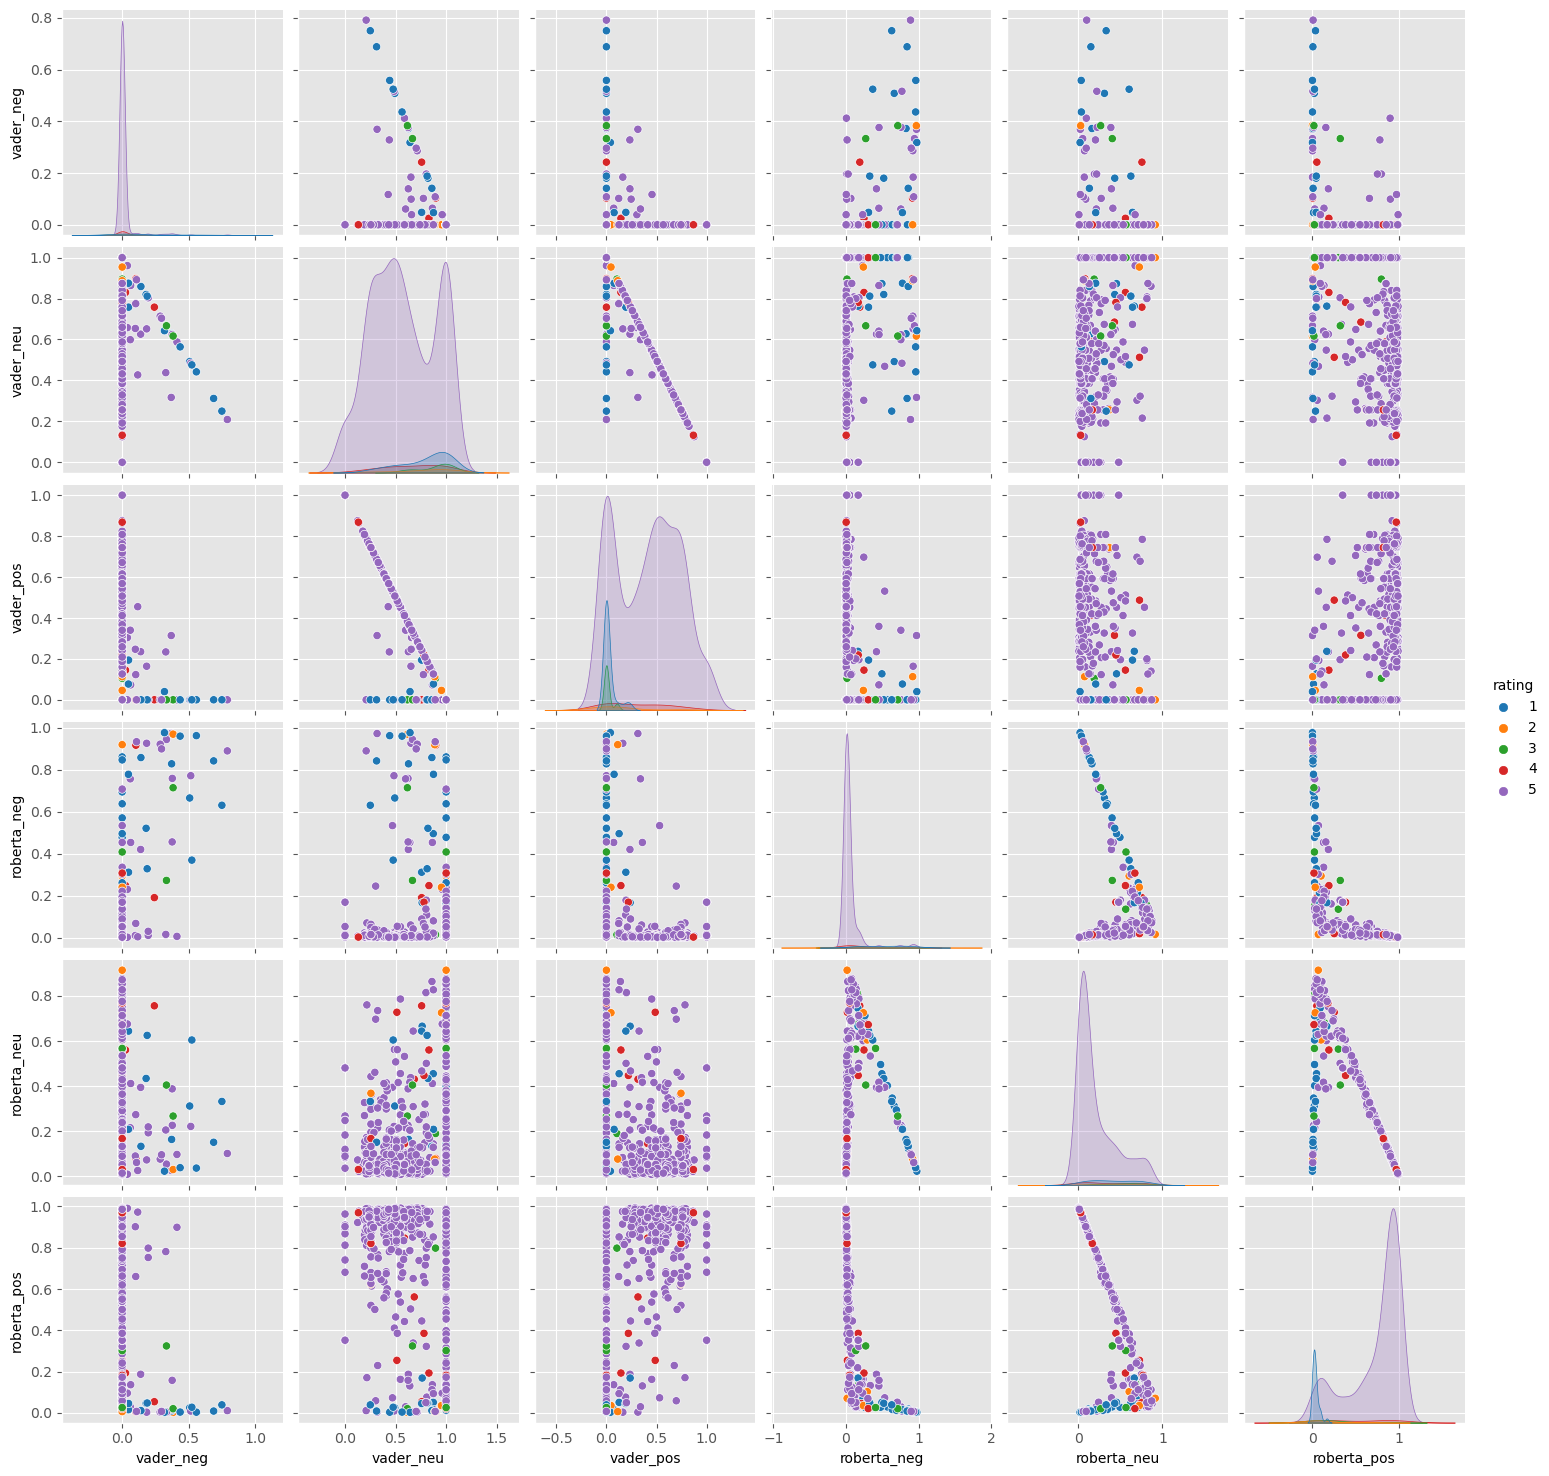

In [53]:
sns.pairplot(data = results_df,
             vars = ['vader_neg', 'vader_neu', 'vader_pos', 
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue = "rating",
            palette = "tab10")
plt.show()

In [49]:
# To identify columns
results_df.columns

Index(['tracking_number', 'vader_neg', 'vader_neu', 'vader_pos',
       'vader_compound', 'roberta_neg', 'roberta_neu', 'roberta_pos', 'week',
       'date', 'order_number', 'order_create_date', 'delivery_date',
       'rider_id', 'rider_name', 'hub_name', 'logistic_name', 'rating',
       'lvl3_destination_address_name', 'lvl4_destination_address_name',
       'review_content', 'review_create_date', 'venture', 'bu_flag',
       'package_type', 'cp_flag'],
      dtype='object')

In [ ]:
#Review Examples

In [54]:
#Text is suppose to be positive, but rated 1 star
results_df.query('rating == 1')\
.sort_values('roberta_pos', ascending=False)['review_content'].values[0]

'he tried to force me to give him 5 stars . lol'

In [55]:
#Text is suppose to be positive, but rated 1 star
results_df.query('rating == 1')\
.sort_values('vader_pos', ascending=False)['review_content'].values[0]

'he tried to force me to give him 5 stars . lol'

In [ ]:
#negative sentiment 5-star review

In [56]:
# Roberta Model
results_df.query('rating == 5')\
.sort_values('roberta_neg', ascending=False)['review_content'].values[0]

'not nice not satisfied'

In [57]:
#Vader Model
results_df.query('rating == 5')\
.sort_values('vader_neg', ascending=False)['review_content'].values[0]

'Very bad'

In [ ]:
#The Transformers Pipeline

In [60]:
from transformers import pipeline
sent_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Downloading:   0%|          | 0.00/629 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/268M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [61]:
sent_pipeline("Make sure to subscribe")

[{'label': 'POSITIVE', 'score': 0.9864296913146973}]

In [62]:
sent_pipeline("Duhh")

[{'label': 'NEGATIVE', 'score': 0.9755446314811707}]